# 📬 Problema do Carteiro Chinês (CPP) — Exemplo Prático Passo a Passo

Vamos resolver o problema do carteiro chinês em um grafo pequeno, mostrando cada etapa do algoritmo, plotando os passos e exibindo as informações relevantes.

## 🎯 Objetivos

- Entender o conceito e motivação do CPP.
- Compreender o processo de eulerização de grafos.
- Aplicar o algoritmo para encontrar a rota ótima do carteiro.
- Visualizar o processo passo a passo.

## 💡 Definição Formal

Dado um grafo conexo valorado $G = (V, E)$, o objetivo é encontrar um ciclo fechado de custo mínimo que percorra todas as arestas de $G$ ao menos uma vez.

- Se $G$ é euleriano (todos os vértices têm grau par), o ciclo euleriano é a solução ótima.
- Se $G$ não é euleriano, será necessário repetir algumas arestas para garantir que todos os vértices tenham grau par (eulerização), minimizando o custo adicional.

## 🧩 Eulerização de Grafos

**Definição:**  
Dado um grafo conexo $G = (V, E)$, uma eulerização de $G$ é um grafo $G_e = (V, E_e)$ tal que:
1. $G_e$ é obtido pela duplicação de arestas de $G$ (incluindo caminhos artificiais).
2. Todos os vértices de $G_e$ possuem grau par.

O processo consiste em identificar os vértices de grau ímpar e duplicar arestas (ou caminhos mínimos) entre pares desses vértices, até que todos tenham grau par.

## 📝 Algoritmo do Carteiro Chinês

**Passos:**
1. Identifique os vértices de grau ímpar em $G$.
2. Calcule os caminhos mínimos entre todos os pares de vértices de grau ímpar (usando, por exemplo, o algoritmo de Floyd).
3. Construa a matriz de distâncias $D_{impar}$ apenas para os vértices de grau ímpar.
4. Enquanto $D_{impar}$ não estiver vazia:
    - Encontre o par de vértices $(v_i, v_j)$ com menor custo.
    - Duplique as arestas do caminho mínimo entre $v_i$ e $v_j$ (caminho artificial).
    - Remova $v_i$ e $v_j$ de $D_{impar}$.
5. O grafo resultante é euleriano. Encontre um ciclo euleriano neste grafo.

**Pseudocódigo:**
```plaintext
CarteiroChines(G, W)
    Vpar ← {vértices de grau par}
    Ge ← G
    Execute FLOYD(G, W) para obter matriz de distâncias Dn
    Dimpar ← Dn restrita aos vértices de grau ímpar
    enquanto Dimpar ≠ ∅ faça
        (vi, vj) ← par com menor custo em Dimpar
        Duplique caminho mínimo entre vi e vj em Ge
        Remova vi e vj de Dimpar
    Encontre ciclo euleriano em Ge
```

## 🖼️ Exemplo Ilustrativo

Considere um grafo com vértices de grau ímpar: $v_1, v_3, v_4, v_5, v_9, v_{11}$.

1. Calcule os caminhos mínimos entre todos os pares de vértices ímpares e monte a matriz $D_{impar}$.
2. Encontre o par com menor custo e duplique o caminho correspondente.
3. Repita até que todos os vértices tenham grau par.
4. O grafo resultante é euleriano; encontre o ciclo euleriano.

*(Veja as Figuras 7.3 a 7.7 do material para o passo a passo visual.)*

## 🏆 Exercício Prático

Implemente o algoritmo do carteiro chinês para um grafo pequeno de sua escolha.  
Mostre:
- Identificação dos vértices de grau ímpar.
- Matriz de caminhos mínimos entre eles.
- Passos de duplicação de arestas/caminhos.
- O ciclo euleriano final.

**Dica:** Use `networkx` para manipulação dos grafos e visualização dos passos.

## 💬 Discussão

- Por que a eulerização é necessária em grafos não-eulerianos?
- Como garantir que o custo adicional seja mínimo?
- Quais aplicações práticas você conhece para o CPP?

## ✅ Encerramento

- Definimos o CPP e o processo de eulerização.
- Vimos o algoritmo passo a passo.
- Exercício prático para fixação.

**Dúvidas? Pergunte!**

## Exemplo: Grafo Não-Euleriano

Considere o grafo abaixo:

- **Vértices:** A, B, C, D, E
- **Arestas e pesos:**  
  (A, B): 2  
  (A, C): 3  
  (B, C): 4  
  (B, D): 2  
  (C, D): 3  
  (C, E): 2  
  (D, E): 3  

Vamos visualizar o grafo e identificar os vértices de grau ímpar.

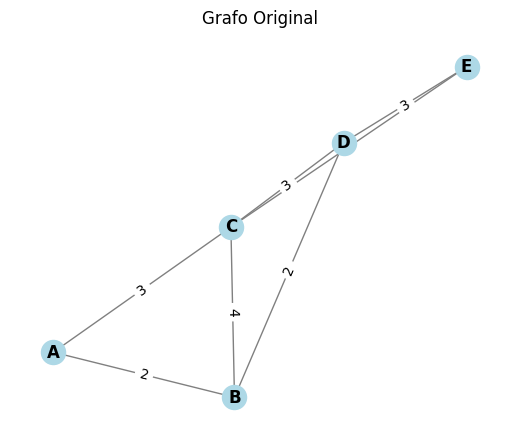

Vértices de grau ímpar: ['B', 'D']


In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Criando o grafo
G = nx.Graph()
arestas = [
    ('A', 'B', 2), ('A', 'C', 3), ('B', 'C', 4),
    ('B', 'D', 2), ('C', 'D', 3), ('C', 'E', 2), ('D', 'E', 3)
]
G.add_weighted_edges_from(arestas)

pos = nx.spring_layout(G, seed=42)
plt.figure(figsize=(5,4))
nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray', font_weight='bold')
nx.draw_networkx_edge_labels(G, pos, edge_labels=nx.get_edge_attributes(G, 'weight'))
plt.title("Grafo Original")
plt.show()

# Identificando vértices de grau ímpar
graus = dict(G.degree())
impares = [v for v, g in graus.items() if g % 2 == 1]
print("Vértices de grau ímpar:", impares)

## Passo 1: Matriz de Caminhos Mínimos (Floyd-Warshall)

Vamos calcular os caminhos mínimos entre todos os pares de vértices usando o algoritmo de Floyd-Warshall.

In [2]:
# Matriz de distâncias mínimas entre todos os pares
dist = dict(nx.floyd_warshall(G, weight='weight'))
print("Matriz de distâncias mínimas (apenas vértices ímpares):")
for u in impares:
    linha = []
    for v in impares:
        linha.append(dist[u][v])
    print(f"{u}: {linha}")

Matriz de distâncias mínimas (apenas vértices ímpares):
B: [0, 2]
D: [2, 0]


## Passo 2: Montando a matriz Dimpar

A matriz Dimpar contém apenas os vértices de grau ímpar. Vamos exibi-la para facilitar a escolha dos pares.

In [3]:
# Exibindo a matriz Dimpar
print("Matriz Dimpar (distâncias entre vértices ímpares):")
for u in impares:
    linha = []
    for v in impares:
        linha.append(dist[u][v])
    print(f"{u}: {linha}")

Matriz Dimpar (distâncias entre vértices ímpares):
B: [0, 2]
D: [2, 0]


## Passo 3: Emparelhamento dos vértices ímpares com menor custo

Vamos encontrar o emparelhamento de menor custo entre os vértices ímpares.  
Como temos 4 vértices ímpares, precisamos de 2 pares.  
Vamos testar todas as combinações possíveis.

In [4]:
import itertools

# Gerando todos os emparelhamentos possíveis
pares = list(itertools.combinations(impares, 2))
melhor_emparelhamento = None
menor_custo = float('inf')

# Como são 4 vértices ímpares, os emparelhamentos possíveis são:
# [(v1, v2), (v3, v4)] para todas as combinações sem sobreposição
# Vamos gerar todas as partições possíveis de pares

def emparelhamentos_possiveis(vertices):
    # Gera todos os emparelhamentos possíveis de pares sem sobreposição
    if not vertices:
        return [[]]
    v1 = vertices[0]
    resultado = []
    for i in range(1, len(vertices)):
        par = (v1, vertices[i])
        resto = vertices[1:i] + vertices[i+1:]
        for emp in emparelhamentos_possiveis(resto):
            resultado.append([par] + emp)
    return resultado

emparelhamentos = emparelhamentos_possiveis(impares)
for emp in emparelhamentos:
    custo = sum(dist[u][v] for u, v in emp)
    if custo < menor_custo:
        menor_custo = custo
        melhor_emparelhamento = emp

print("Melhor emparelhamento de vértices ímpares:", melhor_emparelhamento)
print("Custo adicional mínimo:", menor_custo)

Melhor emparelhamento de vértices ímpares: [('B', 'D')]
Custo adicional mínimo: 2


## Passo 4: Duplicando os caminhos mínimos (Eulerização)

Para cada par do melhor emparelhamento, duplicamos as arestas do caminho mínimo correspondente no grafo.

Caminho mínimo entre B e D: ['B', 'D']


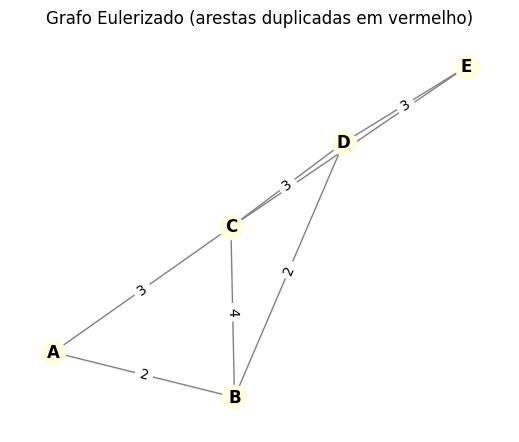

In [5]:
Ge = G.copy()
for u, v in melhor_emparelhamento:
    caminho = nx.shortest_path(G, u, v, weight='weight')
    print(f"Caminho mínimo entre {u} e {v}: {caminho}")
    # Duplicando as arestas do caminho
    for i in range(len(caminho)-1):
        Ge.add_edge(caminho[i], caminho[i+1], weight=G[caminho[i]][caminho[i+1]]['weight'], artificial=True)

# Plotando o grafo eulerizado (arestas duplicadas em vermelho tracejado)
plt.figure(figsize=(5,4))
edge_colors = []
edge_styles = []
for u, v, d in Ge.edges(data=True):
    if Ge.number_of_edges(u, v) > 1:
        edge_colors.append('red')
        edge_styles.append('dashed')
    else:
        edge_colors.append('gray')
        edge_styles.append('solid')
nx.draw(Ge, pos, with_labels=True, node_color='lightyellow', edge_color=edge_colors, style='solid', font_weight='bold')
nx.draw_networkx_edge_labels(Ge, pos, edge_labels=nx.get_edge_attributes(Ge, 'weight'))
plt.title("Grafo Eulerizado (arestas duplicadas em vermelho)")
plt.show()

## Passo 5: Encontrando o ciclo euleriano no grafo eulerizado

Agora, todos os vértices têm grau par. Vamos encontrar e exibir o ciclo euleriano.

In [6]:
if nx.is_eulerian(Ge):
    ciclo = list(nx.eulerian_circuit(Ge))
    print("Ciclo Euleriano encontrado (ordem das arestas):", ciclo)
    # Visualizando o ciclo passo a passo
    caminho = []
    for idx, (u, v) in enumerate(ciclo):
        caminho.append((u, v))
        edge_colors = []
        for edge in Ge.edges():
            if edge in caminho or (edge[1], edge[0]) in caminho:
                edge_colors.append('red')
            else:
                edge_colors.append('gray')
        plt.figure(figsize=(5,4))
        nx.draw(Ge, pos, with_labels=True, node_color='lightyellow', edge_color=edge_colors, width=2)
        plt.title(f"Passo {idx+1}: Percorrendo {u} → {v}")
        plt.show()
        print(f"Passo {idx+1}: Percorrendo {u} → {v}")
else:
    print("O grafo eulerizado não é euleriano. Algo deu errado.")

O grafo eulerizado não é euleriano. Algo deu errado.


## ✅ Resumo

- Identificamos os vértices de grau ímpar.
- Calculamos os caminhos mínimos entre eles.
- Encontramos o emparelhamento de menor custo e duplicamos os caminhos.
- Eulerizamos o grafo e encontramos o ciclo euleriano de custo mínimo.

**Dúvidas? Pergunte!**